# AutoML using the FLAML library

In [160]:
import pandas as pd
from sklearn import metrics
from flaml import AutoML
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

In [98]:
data_path = os.path.join('..', 'dataset', 'train_students.csv')

In [99]:
df = pd.read_csv(data_path)

In [100]:
df.attack_type.unique()

array(['Dos', 'normal', 'Probe', 'R2L', 'U2R'], dtype=object)

In [101]:
df.attack_type.value_counts()

normal    53952
Dos       37306
Probe      9933
R2L        2683
U2R          87
Name: attack_type, dtype: int64

In [102]:
X = df.copy()
y = X.pop('attack_type')

In [103]:
X.shape

(103961, 41)

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [271]:
x_train['attack_type'] = y_train
x_test['attack_type'] = y_test

x_train.to_csv(os.path.join('..', 'dataset', 'train_split.csv'))
x_test.to_csv(os.path.join('..', 'dataset', 'test_split.csv'))

In [272]:
y_train.value_counts() / len(y_train) * 100

normal    51.822496
Dos       35.944594
Probe      9.580608
R2L        2.572784
U2R        0.079518
Name: attack_type, dtype: float64

In [254]:
y_test.value_counts() / len(y_test) * 100

normal    52.118041
Dos       35.704667
Probe      9.476357
R2L        2.604748
U2R        0.096187
Name: attack_type, dtype: float64

In [276]:
settings = {
    "time_budget": -1 ,  # in seconds
    "max_iter" : 300,
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "log_estimator.log",
    'log_type' : 'all',
    'hpo_method' : 'cfo'
}

In [256]:
autoML_model = AutoML(skip_transform = False, )

In [257]:
autoML_model.fit(
    X_train = x_train,
    y_train = y_train,
    **settings
)

[flaml.automl: 02-24 14:21:02] {2599} INFO - task = classification
[flaml.automl: 02-24 14:21:02] {2601} INFO - Data split method: stratified
[flaml.automl: 02-24 14:21:02] {2604} INFO - Evaluation method: holdout
[flaml.automl: 02-24 14:21:02] {2726} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 02-24 14:21:02] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-24 14:21:02] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-24 14:21:02] {3296} INFO - Estimated sufficient time budget=3961s. Estimated necessary time budget=97s.
[flaml.automl: 02-24 14:21:02] {3343} INFO -  at 0.6s,	estimator lgbm's best error=0.1000,	best estimator lgbm's best error=0.1000
[flaml.automl: 02-24 14:21:02] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-24 14:21:02] {3343} INFO -  at 0.6s,	estimator lgbm's best error=0.1000,	best estimator lgbm's best error=0.1000
[flam

In [258]:
print(autoML_model.best_estimator)
print(autoML_model.best_config)

lgbm
{'n_estimators': 135, 'num_leaves': 20, 'min_child_samples': 9, 'learning_rate': 0.15922418945050276, 'log_max_bin': 10, 'colsample_bytree': 0.8345075630938922, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.6702305601383631, 'FLAML_sample_size': 70173}


In [259]:
predictions = autoML_model.predict(x_test)

In [279]:
preds = x_test.copy()
preds['attack_type'] = y_test
preds['attack_predicted'] = predictions

preds.to_csv('predictions.csv')

In [280]:
x_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
76450,0,tcp,http,SF,198,863,0,0,0,0,...,20,1.00,0.00,0.08,0.15,0.00,0.00,0.00,0.00,normal
101925,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
67768,0,tcp,http,SF,304,1010,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.00,0.00,0.00,0.00,normal
3043,0,udp,private,SF,28,0,0,3,0,0,...,60,0.24,0.64,0.24,0.00,0.01,0.00,0.52,0.00,Dos
94266,1,udp,private,SF,105,146,0,0,0,0,...,226,0.89,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40196,0,tcp,http,SF,54540,8314,0,0,0,2,...,254,1.00,0.00,0.00,0.00,0.00,0.00,0.05,0.05,Dos
100036,0,icmp,eco_i,SF,8,0,0,0,0,0,...,216,1.00,0.00,1.00,0.25,0.00,0.00,0.00,0.00,Probe
11439,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.96,0.00,0.00,0.10,0.00,0.81,1.00,Probe
14222,0,tcp,smtp,SF,1353,330,0,0,0,0,...,149,0.58,0.03,0.00,0.00,0.01,0.02,0.00,0.01,normal


<Figure size 640x480 with 0 Axes>

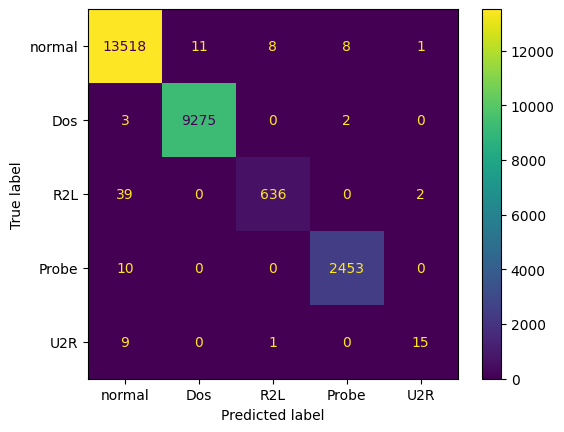

In [260]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions, labels=list(y_test.unique()))
plt.figure()
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=list(y_test.unique()))
disp.plot()
plt.show()

In [261]:
metrics.accuracy_score(y_test, predictions)

0.9963833634719711

In [262]:
metrics.f1_score(y_test, predictions, average='weighted')

0.9963215513202046

In [263]:
metrics.precision_score(y_test, predictions, average='weighted')

0.9963272737790199

In [264]:
metrics.recall_score(y_test, predictions, average='weighted')

0.9963833634719711

In [265]:
metric = '1 - Accuracy'
log_path = 'data_log.log'

In [266]:
def row_to_dataframe(row):
    content = json.loads(row)
    iteration = content['record_id']
    trial_time = content['trial_time']
    wall_clock_time = content['wall_clock_time']
    validation_loss = content['validation_loss']
    model = content['learner']
    config = content['config']

    df = pd.DataFrame(
        np.array([[iteration, trial_time, wall_clock_time, validation_loss, model, config]]),
        columns=[
            'Iteration',
            'Trial time',
            'Wall clock time',
            'Validation loss',
            'Model',
            'Config'
            ])
    return df

In [267]:
def minimize_plots(log, metric, logs_path):
    plt.figure(figsize=(15, 7))
    ax = sns.barplot(data=log, x='Model', y='Validation loss', estimator='min', errorbar=None)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.ylabel(metric.upper())
    plt.xlabel('Models')
    plt.title(f'Minimum {metric.upper()} for each model type')
    plt.savefig(os.path.join(logs_path,'results_plots', 'min_validation_val_per_model.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'min_validation_val_per_model.pdf'))
    plt.show()
    
    plt.close()

    # print('*********** BEST MODELS ***********')
    # print(log.sort_values(by='Validation loss'))

    indexes = [0]
    val_loss = float(log.loc[[0]]['Validation loss'])
    models = [str(log['Model'][0])]
    losses = [val_loss]
    averages = [np.array(losses).mean()]
    for i in range(1, len(log)):
        aux = float(log.loc[[i]]['Validation loss'])
        if  aux < val_loss:
            indexes.append(i)
            models.append(str(log['Model'][i]))
            losses.append(aux)
            val_loss = aux
        else:
            indexes.append(indexes[-1])
            models.append(models[-1])
            losses.append(val_loss)
        averages.append(np.array(losses).mean())
    log['Best Iteration so far'] = indexes
    log['Best loss so far'] = list(log.loc[indexes]['Validation loss'])
    log['Best model so far'] = models
    log['Best loss'] = losses
    log['Average loss'] = averages
    
    return log, losses, averages

In [277]:
def plot_results(logs_path, metric):
    with open(os.path.join(logs_path, 'log_estimator.log'), 'r') as file:
        content_lines = file.readlines()
        file.close()
    
    log = row_to_dataframe(content_lines[0])
    for i in range(1, len(content_lines)-1):
        aux = row_to_dataframe(content_lines[i])
        log = pd.concat([log, aux], ignore_index=True)
    log.Model = log.Model.str.upper()
    log['Iteration'] = log['Iteration'].astype(int)
    log['Trial time'] = log['Trial time'].astype(float)
    log['Wall clock time'] = log['Wall clock time'].astype(float)
    log['Validation loss'] = log['Validation loss'].astype(float)

    plt.figure(figsize=(20, 15))
    sns.scatterplot(data=log, x='Iteration', y='Validation loss', hue='Model')
    plt.title(f'{metric.upper()} per iteration')
    plt.ylabel(metric.upper())
    plt.savefig(os.path.join(logs_path,'results_plots', 'validation_per_iteration.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'validation_per_iteration.pdf'))
    plt.show()
    
    plt.show()
    plt.close()

    plt.figure(figsize=(15, 7))
    ax = sns.histplot(data=log, x='Model')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title('Number iterations of each model')
    plt.ylabel('Number of iterations')
    plt.savefig(os.path.join(logs_path,'results_plots', 'iterations_per_model.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'iterations_per_model.pdf'))
    plt.show()
    
    plt.close()

    plt.figure(figsize=(20, 15))
    sns.scatterplot(data=log, x='Iteration', y='Trial time', hue='Model')
    plt.title('Trial time of each iteration')
    plt.savefig(os.path.join(logs_path,'results_plots', 'trial_time_per_iter.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'trial_time_per_iter.pdf'))
    plt.show()
    
    plt.close()
    
    plt.figure(figsize=(15, 7))
    ax = sns.barplot(data=log, x='Model', y='Validation loss', estimator='mean', errorbar=None)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.ylabel(metric.upper())
    plt.xlabel('Models')
    plt.title(f'Average {metric.upper()} for each model type')
    plt.savefig(os.path.join(logs_path,'results_plots', 'average_validation_val_per_model.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'average_validation_val_per_model.pdf'))
    plt.show()
    
    plt.close()

    log, losses, averages = minimize_plots(log, metric, logs_path)

    plt.figure(figsize=(20, 15))
    sns.scatterplot(data=log, x='Iteration', y='Best loss', hue='Best model so far')
    plt.title(f'{metric.upper()} of the best models found over iterations')
    plt.ylabel(metric.upper())
    plt.savefig(os.path.join(logs_path,'results_plots', 'best_validation_loss.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'best_validation_loss.pdf'))
    plt.show()
    
    plt.close()

    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=log, x='Iteration', y='Best loss', label='Best loss')
    sns.lineplot(data=log, x='Iteration', y='Average loss', color='red', label='Average loss')
    plt.ylabel(metric.upper())
    plt.title(f'[{metric.upper()}] Average: {averages[-1]} | Best: {losses[-1]} - {log.loc[len(log)-1, "Best model so far"].upper()}')
    plt.savefig(os.path.join(logs_path,'results_plots', 'best_loss_mean.png'))
    plt.savefig(os.path.join(logs_path,'results_plots', 'best_loss_mean.pdf'))
    plt.show()
    plt.close()


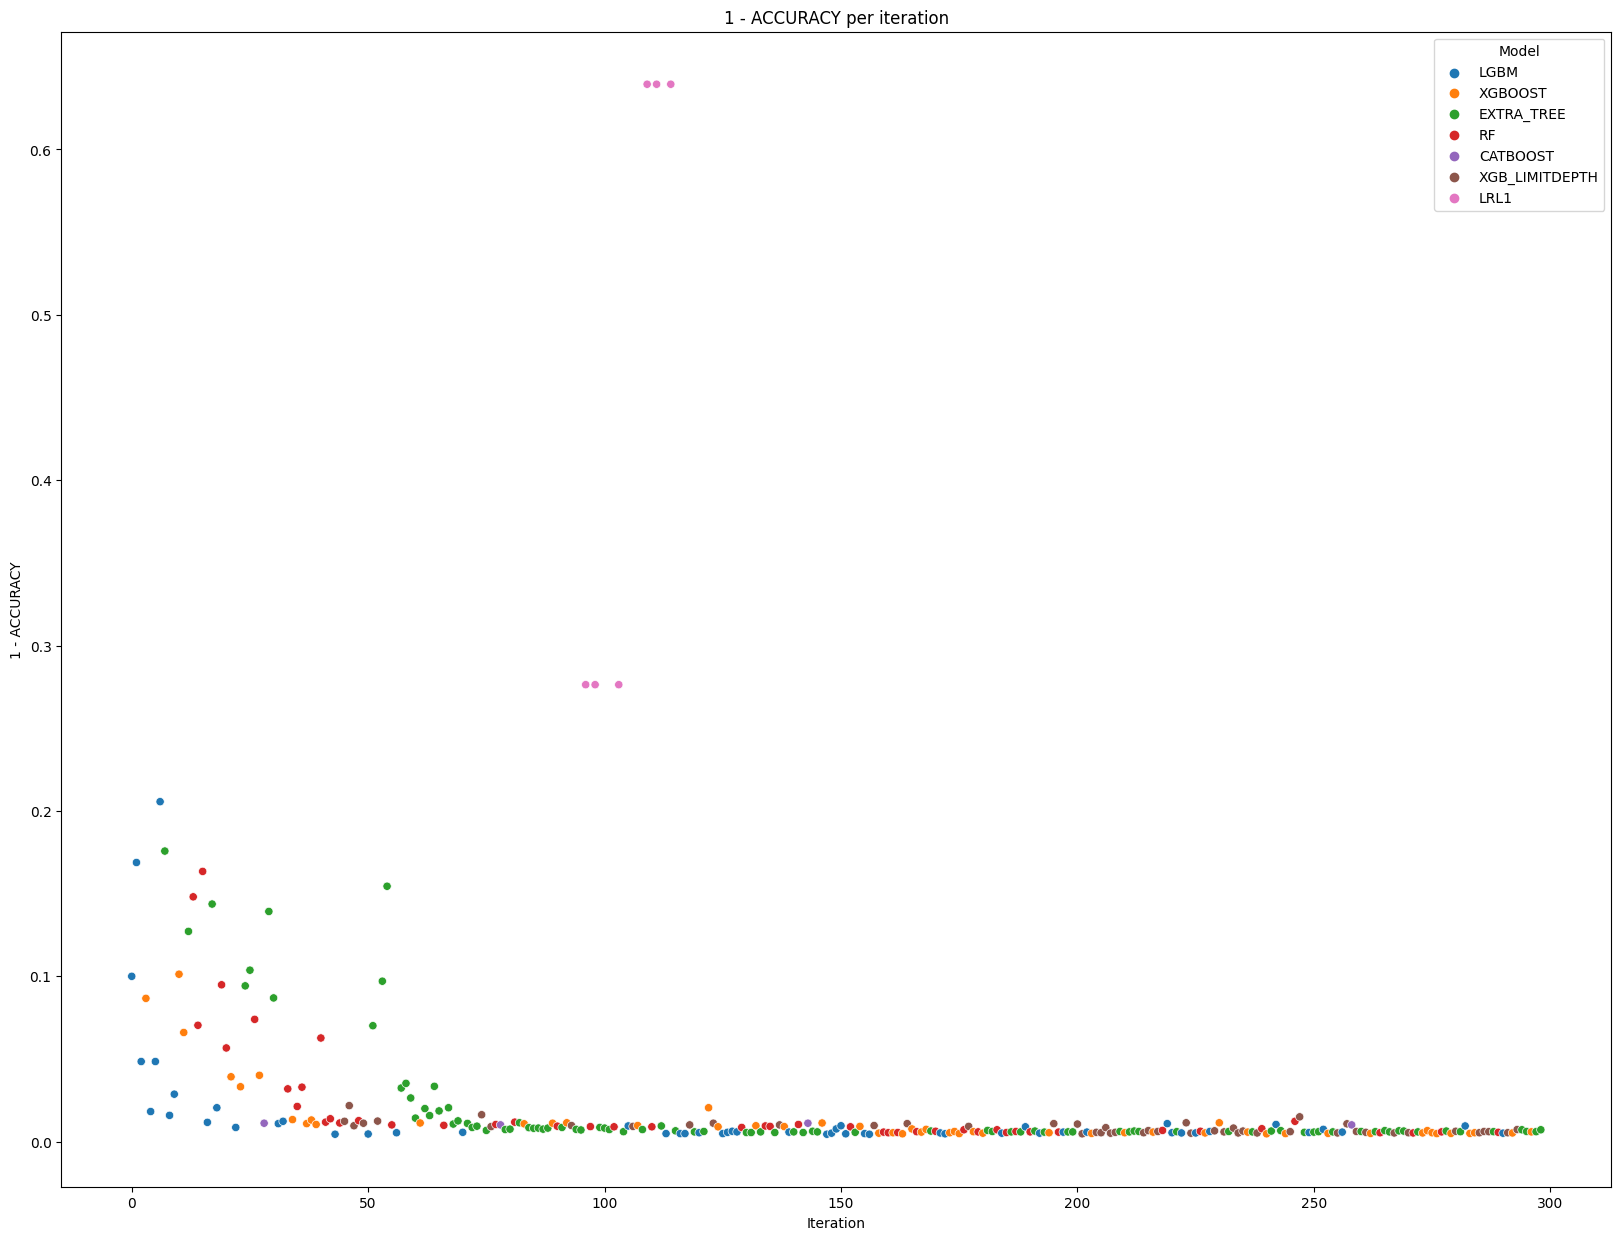

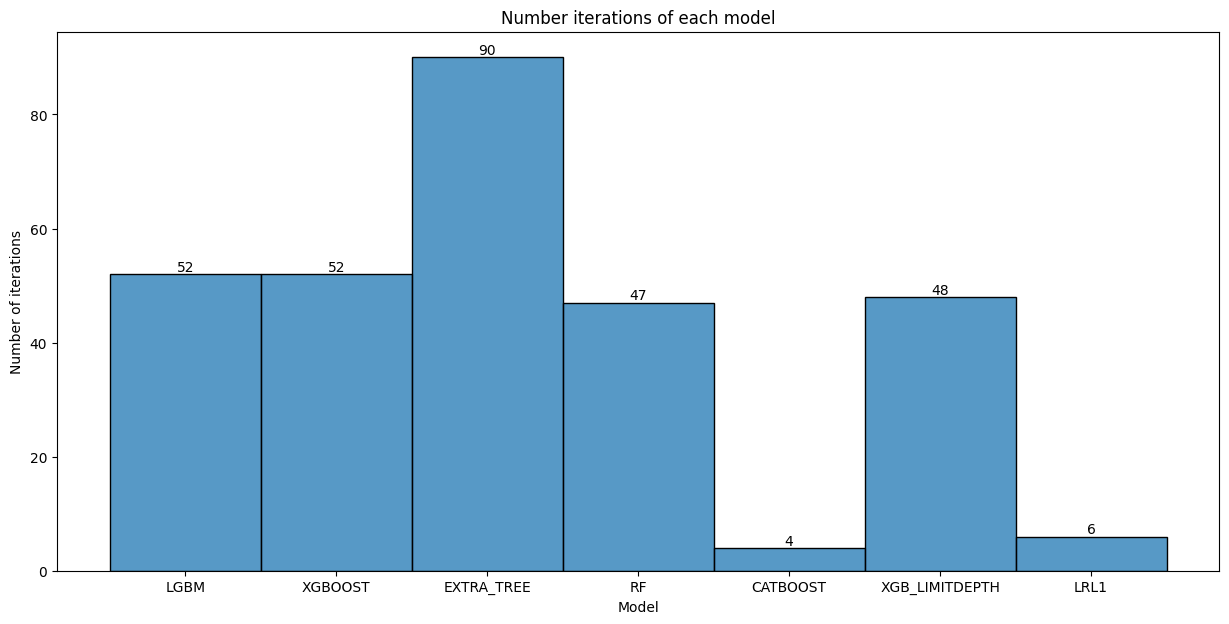

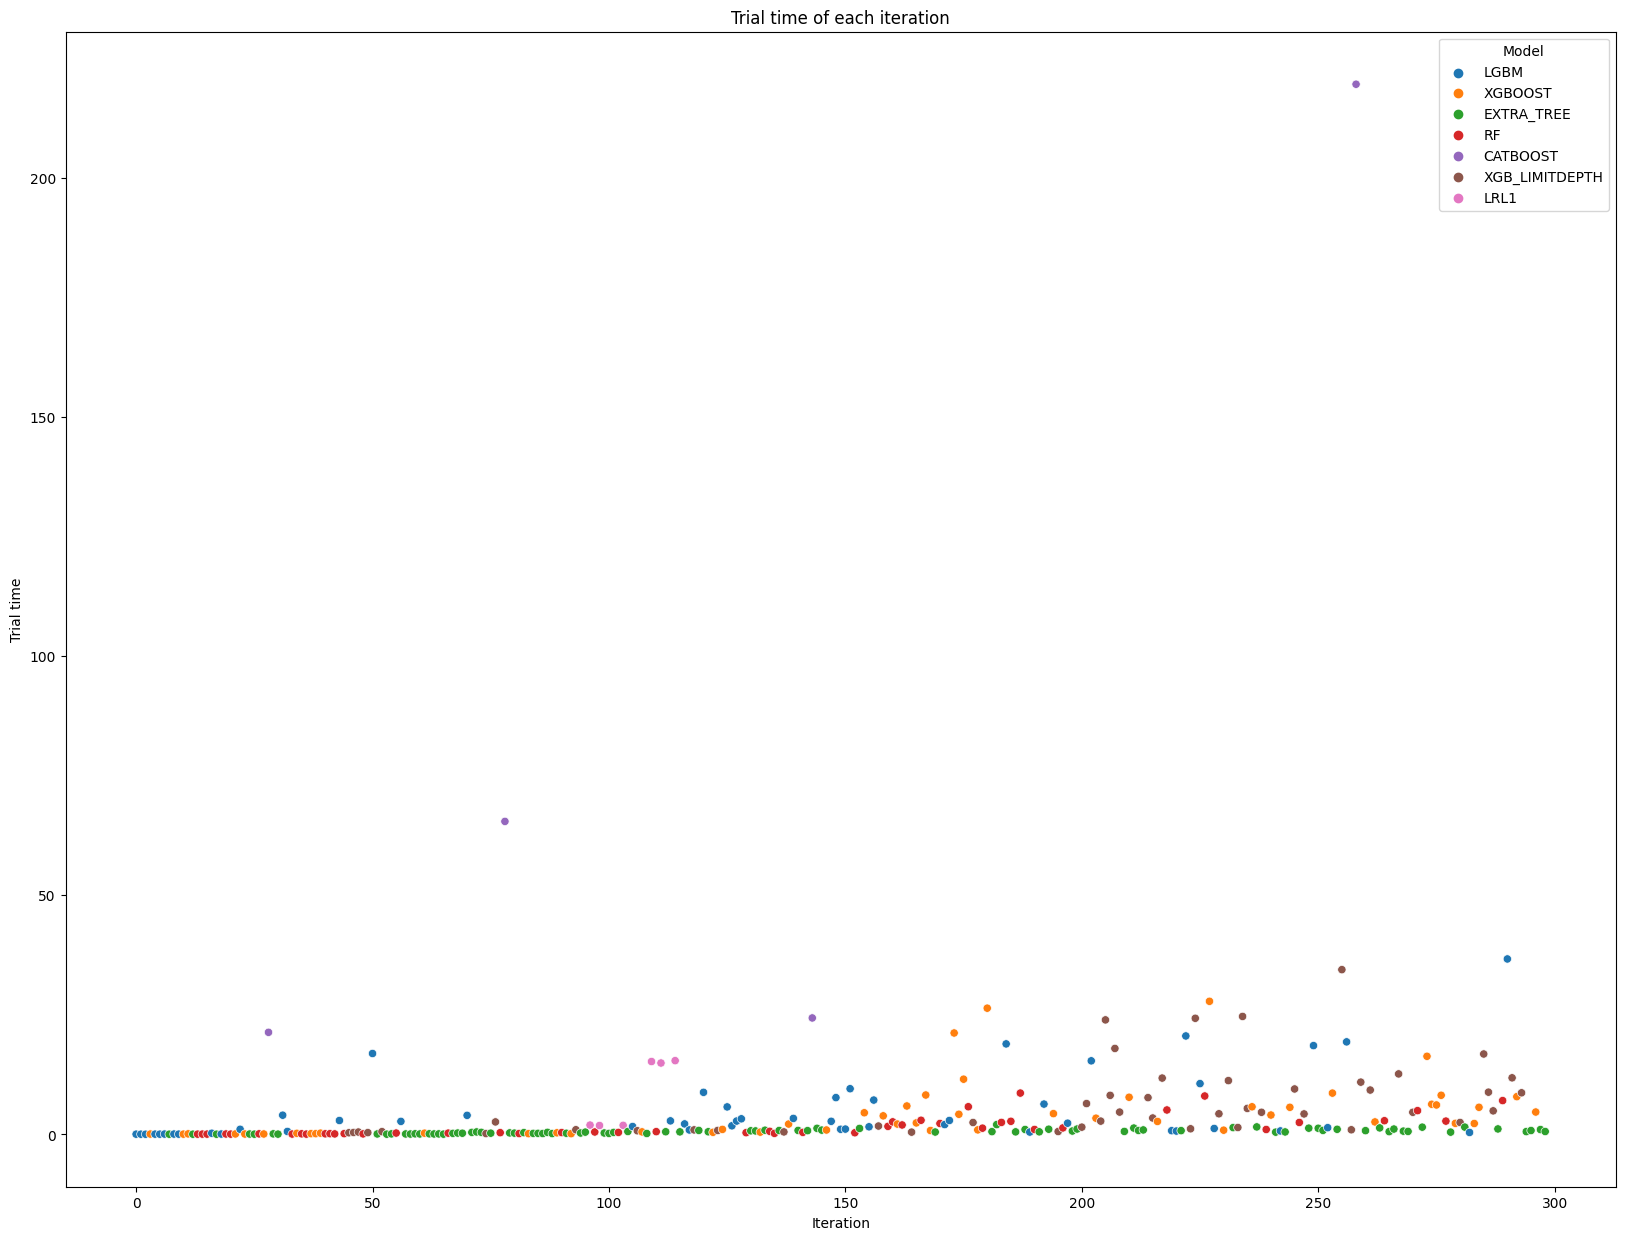

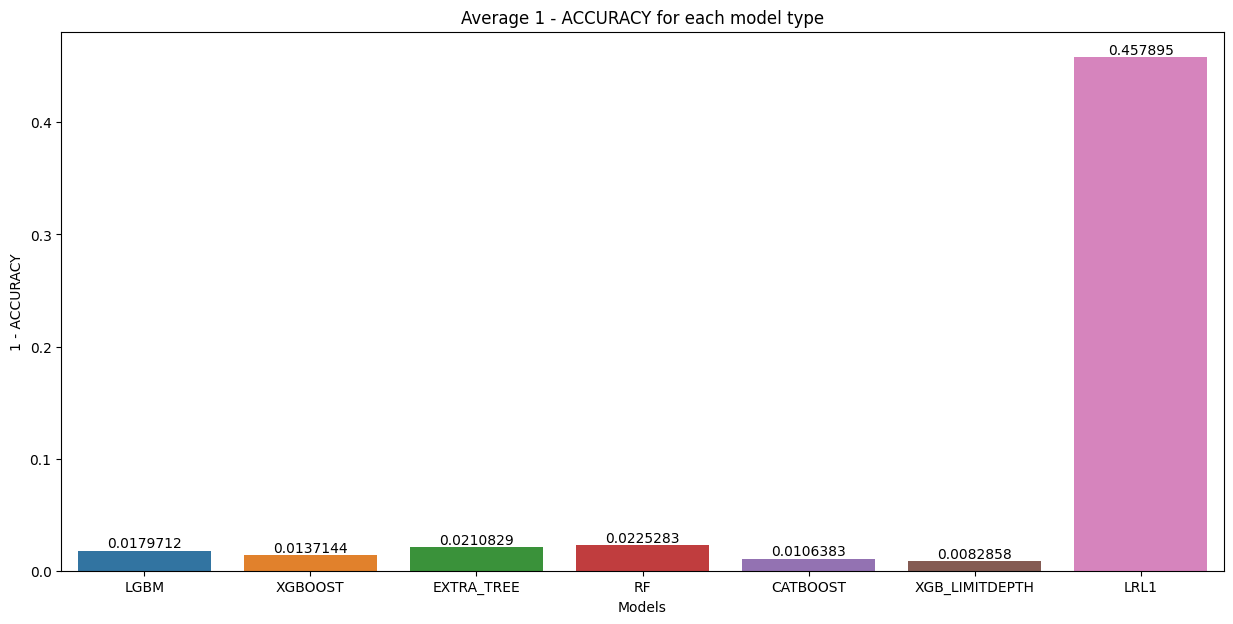

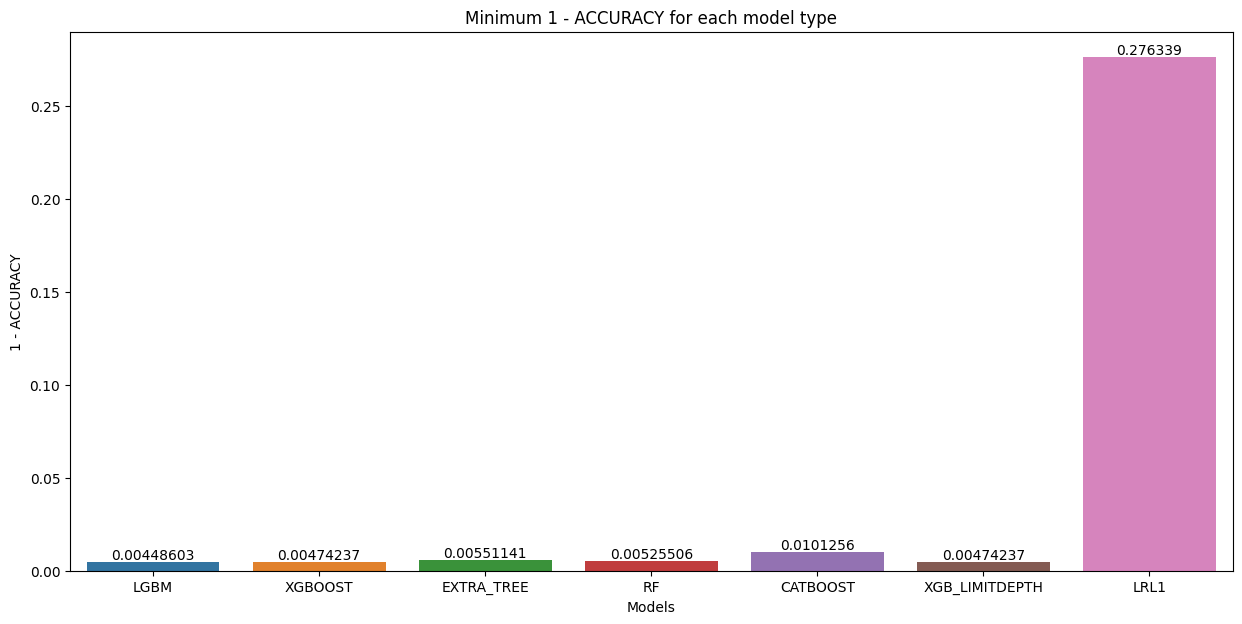

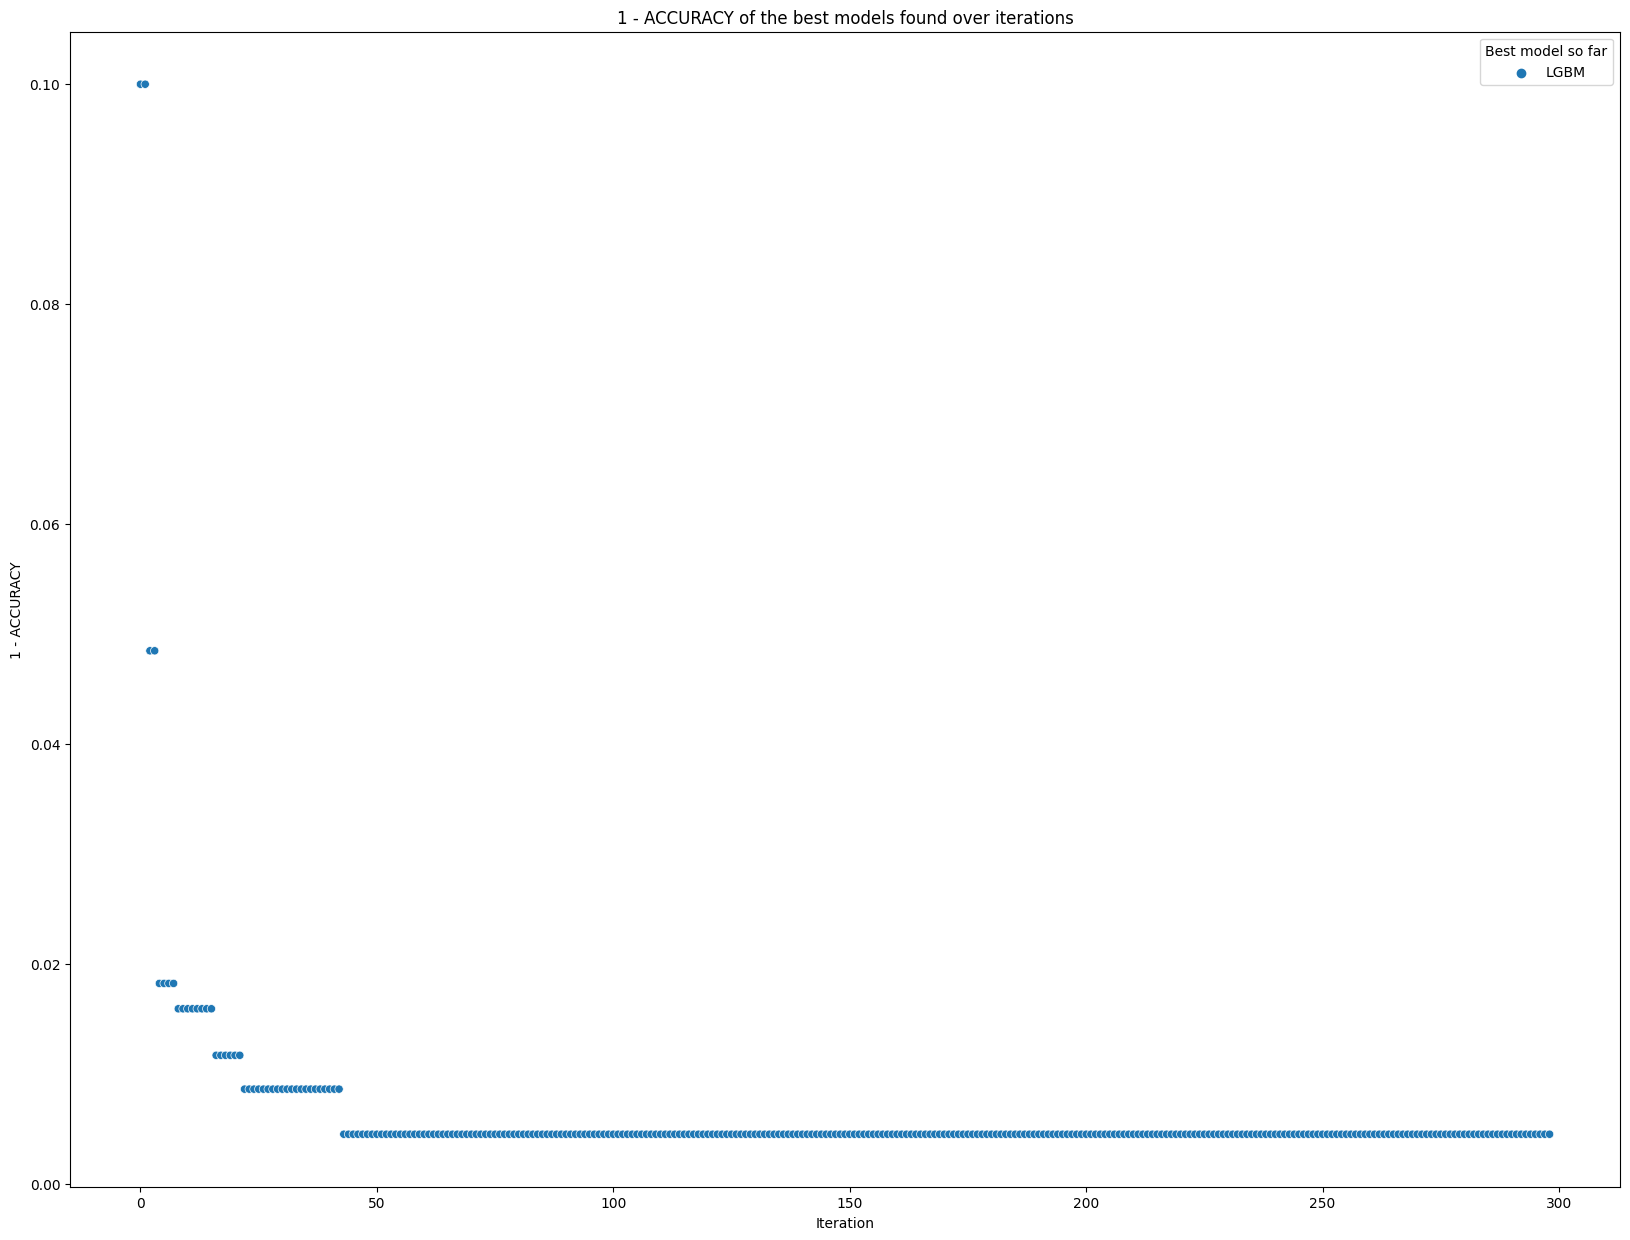

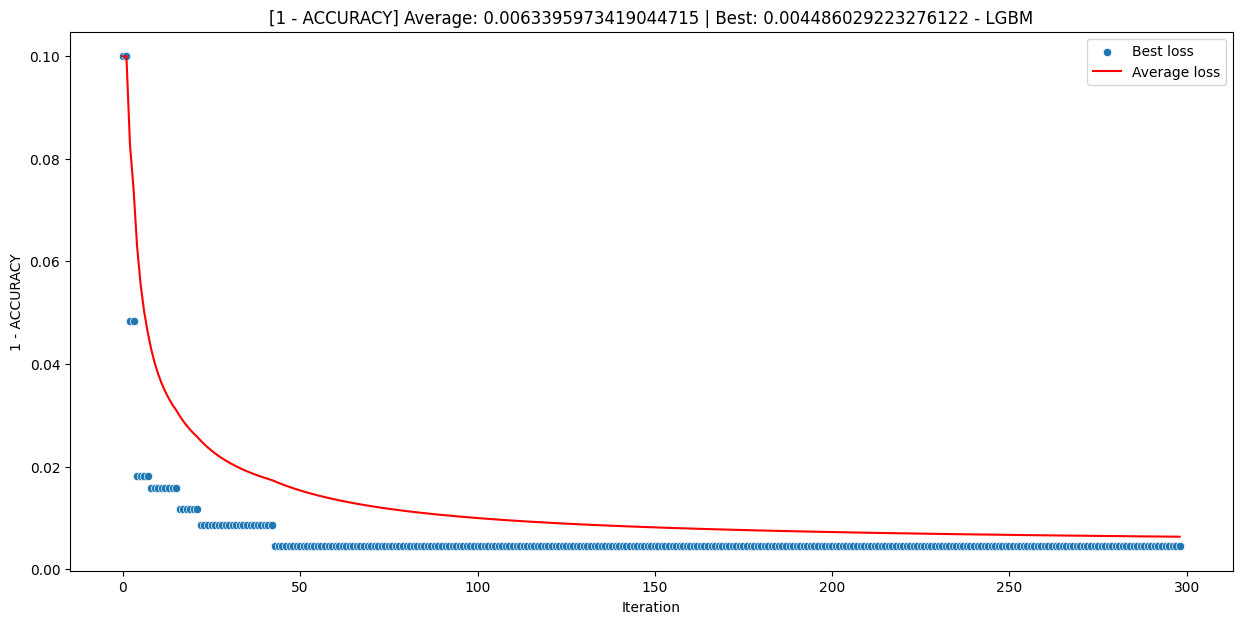

In [278]:
plot_results('', metric)